Загрузка данных, создание фичей

In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

plt.rcParams["figure.figsize"] = (12, 7)
sns.set_style("whitegrid")
sns.set_palette("husl")

data_url = "https://raw.githubusercontent.com/Raven-ES1617/cu/refs/heads/main/science_studio/whole_data_practice_4.csv"
df = pd.read_csv(data_url)
df.set_index(["RAJ2000", "DEJ2000"], inplace=True)

error_cols = [col for col in df.columns if col.startswith("e_")]
df.drop(columns=error_cols, inplace=True)

print(f"Всего объектов: {df.shape[0]}, переменных: {df['present'].sum()}")

magnitude_features = ["Vmag", "Bmag", "gpmag", "rpmag", "ipmag", "fuv_mag", "nuv_mag"]

for mag1, mag2 in combinations(magnitude_features, 2):
    col_name = f"{mag1.split('_')[0]}-{mag2.split('_')[0]}"
    df[col_name] = df[mag1] - df[mag2]

df["amplitude"] = df["max_mag"] - df["min_mag"]

X_all = df.drop("present", axis=1)
target = df["present"]

X_tr, X_te, y_tr, y_te = train_test_split(
    X_all, target, test_size=0.3, random_state=42, stratify=target
)


Всего объектов: 56298, переменных: 5910


Обучение всех моделей

Decision Tree

In [2]:
# dt = DecisionTreeClassifier(random_state=42)

# dt_params = {
#     "max_depth": [5, 8, 10, None],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
# }

# dt_grid = GridSearchCV(dt, dt_params, cv=3, scoring="f1", n_jobs=-1)
# dt_grid.fit(X_tr, y_tr)

best_dt = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
best_dt.fit(X_tr, y_tr)

# best_dt = dt_grid.best_estimator_
pred_dt = best_dt.predict(X_te)

print("Decision Tree")
# print(f"Best params: {dt_grid.best_params_}")
print(f"Accuracy  : {accuracy_score(y_te, pred_dt):.4f}")
print(f"Precision : {precision_score(y_te, pred_dt):.4f}")
print(f"Recall    : {recall_score(y_te, pred_dt):.4f}")
print(f"F1        : {f1_score(y_te, pred_dt):.4f}\n")


Decision Tree
Accuracy  : 0.8992
Precision : 0.5222
Recall    : 0.4704
F1        : 0.4950



Random Forest

In [3]:
# rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# rf_params = {
#     "n_estimators": [200, 300],
#     "max_depth": [None, 10, 15],
#     "min_samples_split": [2, 5],
#     "min_samples_leaf": [1, 2],
# }

# rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring="f1", n_jobs=-1)
# rf_grid.fit(X_tr, y_tr)

# best_rf = rf_grid.best_estimator_
best_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_tr, y_tr)
pred_rf = best_rf.predict(X_te)

print("Random Forest")
# print(f"Best params: {rf_grid.best_params_}")
print(f"Accuracy  : {accuracy_score(y_te, pred_rf):.4f}")
print(f"Precision : {precision_score(y_te, pred_rf):.4f}")
print(f"Recall    : {recall_score(y_te, pred_rf):.4f}")
print(f"F1        : {f1_score(y_te, pred_rf):.4f}\n")


Random Forest
Accuracy  : 0.9285
Precision : 0.8291
Recall    : 0.4021
F1        : 0.5416



Gradient Boosting

In [4]:
# gb = GradientBoostingClassifier(random_state=42)

# gb_params = {
#     "n_estimators": [200, 300],
#     "learning_rate": [0.05, 0.1],
#     "max_depth": [3, 5],
# }

# gb_grid = GridSearchCV(gb, gb_params, cv=3, scoring="f1", n_jobs=-1)
# gb_grid.fit(X_tr, y_tr)

# best_gb = gb_grid.best_estimator_

best_gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
best_gb.fit(X_tr, y_tr)
pred_gb = best_gb.predict(X_te)

print("Gradient Boosting")
# print(f"Best params: {gb_grid.best_params_}")
print(f"Accuracy  : {accuracy_score(y_te, pred_gb):.4f}")
print(f"Precision : {precision_score(y_te, pred_gb):.4f}")
print(f"Recall    : {recall_score(y_te, pred_gb):.4f}")
print(f"F1        : {f1_score(y_te, pred_gb):.4f}\n")


Gradient Boosting
Accuracy  : 0.9400
Precision : 0.7987
Recall    : 0.5730
F1        : 0.6673



XGboost

In [5]:
# weight = (y_tr == 0).sum() / (y_tr == 1).sum()

# xgb = XGBClassifier(
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric="logloss",
#     n_jobs=-1,
#     scale_pos_weight=weight,
# )

# xgb_params = {
#     "n_estimators": [200, 300],
#     "max_depth": [4, 6],
#     "learning_rate": [0.05, 0.1],
# }

# xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring="f1", n_jobs=-1)
# xgb_grid.fit(X_tr, y_tr)

# best_xgb = xgb_grid.best_estimator_

weight = (y_tr == 0).sum() / (y_tr == 1).sum()

best_xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=weight,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)
best_xgb.fit(X_tr, y_tr)
pred_xgb = best_xgb.predict(X_te)

print("XGBoost")
# print(f"Best params: {xgb_grid.best_params_}")
print(f"Accuracy  : {accuracy_score(y_te, pred_xgb):.4f}")
print(f"Precision : {precision_score(y_te, pred_xgb):.4f}")
print(f"Recall    : {recall_score(y_te, pred_xgb):.4f}")
print(f"F1        : {f1_score(y_te, pred_xgb):.4f}")


XGBoost
Accuracy  : 0.9287
Precision : 0.6118
Recall    : 0.8782
F1        : 0.7212


Catboost

In [ ]:
from catboost import CatBoostClassifier

# cat = CatBoostClassifier(
#     random_state=42,
#     verbose=False,
#     thread_count=-1,
#     auto_class_weights="Balanced",
# )

# cat_params = {
#     "iterations": [300, 500],
#     "depth": [6, 8],
#     "learning_rate": [0.05, 0.1],
#     "l2_leaf_reg": [3, 5],
# }

# cat_grid = GridSearchCV(cat, cat_params, cv=3, scoring="f1", n_jobs=1)

# cat_grid.fit(X_tr, y_tr)

# best_cat = cat_grid.best_estimator_

best_cat = CatBoostClassifier(
    iterations=500,
    depth=8,
    learning_rate=0.1,
    l2_leaf_reg=3,
    auto_class_weights="Balanced",
    random_state=42,
    verbose=False,
    thread_count=-1,
)
best_cat.fit(X_tr, y_tr)
pred_cat = best_cat.predict(X_te)

print("CatBoost")
# print(f"Best params: {cat_grid.best_params_}")
print(f"Accuracy  : {accuracy_score(y_te, pred_cat):.4f}")
print(f"Precision : {precision_score(y_te, pred_cat):.4f}")
print(f"Recall    : {recall_score(y_te, pred_cat):.4f}")
print(f"F1        : {f1_score(y_te, pred_cat):.4f}")

CatBoost
Accuracy  : 0.9415
Precision : 0.6613
Recall    : 0.9075
F1        : 0.7651


Сравнение всех моделей

Сравнение всех моделей
            Model  Accuracy  Precision  Recall     F1
         CatBoost    0.9415     0.6613  0.9075 0.7651
          XGBoost    0.9287     0.6118  0.8782 0.7212
Gradient Boosting    0.9400     0.7987  0.5730 0.6673
    Random Forest    0.9285     0.8291  0.4021 0.5416
    Decision Tree    0.8992     0.5222  0.4704 0.4950


C:\Users\grudn\AppData\Local\Temp\ipykernel_20344\3747916314.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(12), x="importance", y="feature", palette="viridis")


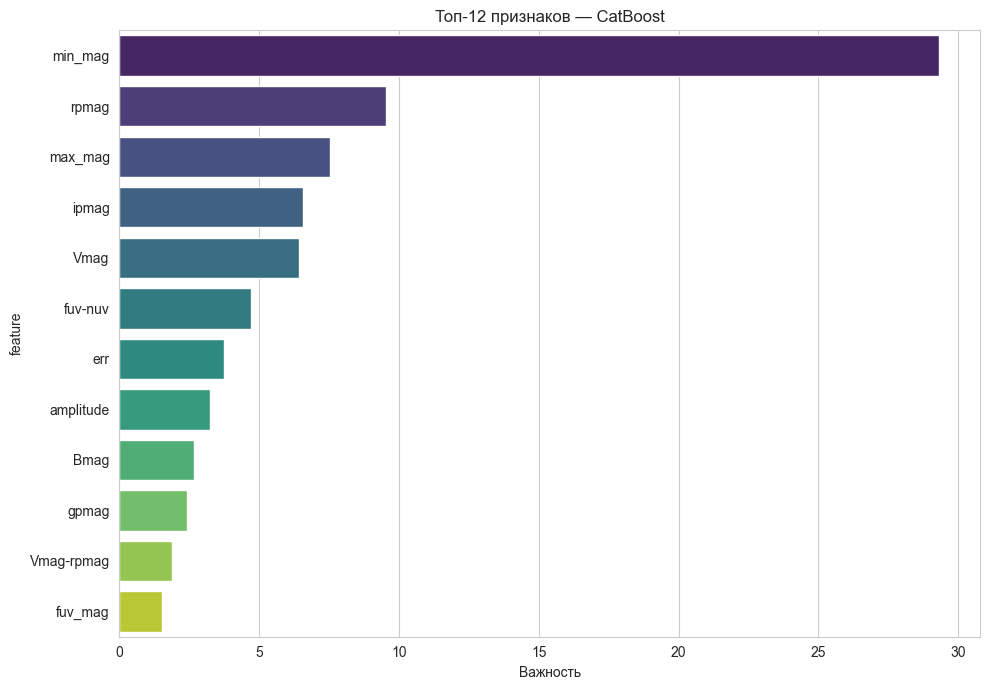

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = []

for name, model, pred in [
    ("Decision Tree", best_dt, best_dt.predict(X_te)),
    ("Random Forest", best_rf, best_rf.predict(X_te)),
    ("Gradient Boosting", best_gb, best_gb.predict(X_te)),
    ("XGBoost", best_xgb, best_xgb.predict(X_te)),
    ("CatBoost", best_cat, best_cat.predict(X_te)),
]:
    results.append(
        {
            "Model": name,
            "Accuracy": accuracy_score(y_te, pred),
            "Precision": precision_score(y_te, pred),
            "Recall": recall_score(y_te, pred),
            "F1": f1_score(y_te, pred),
        }
    )

results_df = pd.DataFrame(results)
results_df = results_df.round(4)
results_df = results_df.sort_values("F1", ascending=False).reset_index(drop=True)


print("Сравнение всех моделей")
print(results_df.to_string(index=False))

best_model_name = results_df.iloc[0]["Model"]
best_model_obj = {
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb,
    "CatBoost": best_cat,
}[best_model_name]

importances = pd.DataFrame(
    {"feature": X_tr.columns, "importance": best_model_obj.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 7))
sns.barplot(data=importances.head(12), x="importance", y="feature", palette="viridis")
plt.title(f"Топ-12 признаков — {best_model_name}")
plt.xlabel("Важность")
plt.tight_layout()
plt.show()

# Каскад моделей

Каскад только на тестовой выборке

In [23]:
xgb_proba_test = best_xgb.predict_proba(X_te)[:, 1]

threshold = 0.1
stage1_idx = xgb_proba_test > threshold
stage1 = X_te[stage1_idx].copy()
stage1["xgb_score"] = xgb_proba_test[stage1_idx]
stage1["true_class"] = y_te.values[stage1_idx]

print(f"{len(stage1):,} кандидатов из {len(X_te)}")

cat_pred = best_cat.predict(
    stage1.drop(columns=["xgb_score", "true_class"], errors="ignore")
)
cat_proba = best_cat.predict_proba(
    stage1.drop(columns=["xgb_score", "true_class"], errors="ignore")
)[:, 1]

final_idx = cat_pred == 1
final_candidates = stage1[final_idx].copy()
final_candidates["cat_score"] = cat_proba[final_idx]

print(f"{len(final_candidates):,} финальных объектов")

tp = final_candidates["true_class"].sum()
total_positive_in_test = y_te.sum()

precision = tp / len(final_candidates)
recall = tp / total_positive_in_test
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print("Каскад XGBoost и CatBoost")
print(f"Кандидатов отобрано        : {len(final_candidates):6}")
print(f"Из них реальных переменных : {tp:6} из {total_positive_in_test} в тесте")
print(f"Precision (чистота)        : {precision:.4f}")
print(f"Recall (покрытие в тесте)  : {recall:.4f}")
print(f"F1-мера каскада            : {f1:.4f}")

4,539 кандидатов из 16890
2,430 финальных объектов
Каскад XGBoost и CatBoost
Кандидатов отобрано        :   2430
Из них реальных переменных :   1608 из 1773 в тесте
Precision (чистота)        : 0.6617
Recall (покрытие в тесте)  : 0.9069
F1-мера каскада            : 0.7652


Каскад catboost с catboost

In [19]:
cat_proba_test = best_cat.predict_proba(X_te)[:, 1]

threshold = 0.65

final_mask = cat_proba_test >= threshold
final_candidates = X_te[final_mask].copy()
final_candidates["cat_score"] = cat_proba_test[final_mask]
final_candidates["true_class"] = y_te.values[final_mask]

tp = final_candidates["true_class"].sum()
total_pos = y_te.sum()

precision = tp / len(final_candidates)
recall = tp / total_pos
f1 = 2 * precision * recall / (precision + recall)

print(f"Порог CatBoost ≥ {threshold}")
print(f"Кандидатов отобрано: {len(final_candidates)}")
print(f"Из них настоящих: {tp} из {total_pos}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

Порог CatBoost ≥ 0.65
Кандидатов отобрано: 2084
Из них настоящих: 1509 из 1773
Precision: 0.7241
Recall: 0.8511
F1: 0.7825
